In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### De Perceptron

De meest simpele variant van de **perceptron** bestaat uit:
- lineaire combinatie van inputs en gewichten
- een threshold functie $f$

Bijvoorbeeld, gegeven dat input vector $\mathbf{x}$ binair is, berekenen we
$$
    y = f\left(\sum_{j = 1}^d w_j x_j + w_0\right)
$$
waarbij 
$$
    f(x) = \begin{cases}
        1 & \text{if $x > 0$}\\
        0 & \text{otherwise}
    \end{cases}
$$
is de **activatie functie**, i.e., model voor de stimulans van een neuron.

Voorbeeld toepassingen:
- leren van de logische AND-gate
- leren van de logische OR-gate

In [6]:
# threshold functie "vectorized" zodat deze toepasbaar is op numpy arrays
f = np.vectorize(lambda x: 1 if x > 0 else 0)

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

# parameters met de hand gekozen (zonder machine learning)
and_gate = lambda x1, x2: f(1*x1 + 1*x2 - 1.5)
or_gate = lambda x1, x2: f(1*x1 + 1*x2 - 0.5)

print(f"AND gate outputs: {and_gate(X[:, 0], X[:, 1])}")
print(f"OR gate outputs:  {or_gate(X[:, 0], X[:, 1])}")

AND gate outputs: [0 0 0 1]
OR gate outputs:  [0 1 1 1]


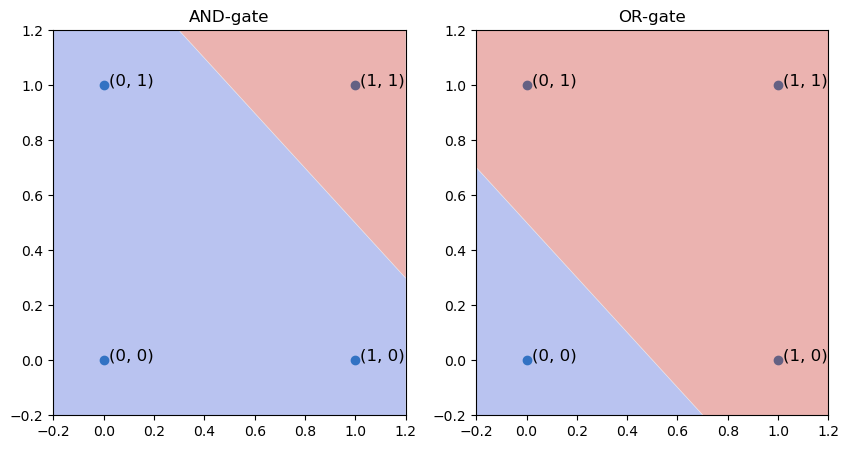

In [7]:
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 300), 
    np.linspace(-0.2, 1.2, 300) 
)
D = np.vstack((xx.flatten(), yy.flatten())).T

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(X[:, 0], X[:, 1])
axes[1].scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    axes[0].annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)
    axes[1].annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)

axes[0].set_title("AND-gate")
axes[1].set_title("OR-gate")

axes[0].contourf(xx, yy, and_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)
axes[1].contourf(xx, yy, or_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)

Enkele observaties:
- Een perceptron is een model van een **kunstmatige neuron**. 
- Lineaire discriminant, dus dit model kan de non-lineaire XOR-gate niet oplossen. 
- Threshold functie $f$ is een *harde* thresholding functie, en **sigmoid** is een *zachte* thresholding functie

Meerdere perceptron kunnen worden georganiseerd in een netwerk (deep learning). Hiermee kunnen non-lineaire problemen **wel** worden opgelost. 

### Exclusive Or (XOR)

|x1|x2|XOR|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

$x_1 \text{ XOR } x_2 = (x_1 \text{ AND } \text{ NOT } x_2) \text{ OR } (\text{ NOT } x_1 \text{ AND } x_2)$

$x_1 \oplus x_2 = (x_1 \land \neg x_2) \lor (\neg x_1 \land x_2)$


In [8]:
# NOT gate
not_gate = lambda x1: f(-1*x1 + 0.5)

not_gate(0), not_gate(1)

(array(1), array(0))

In [9]:
xor_gate = lambda x1, x2: or_gate(and_gate(x1, not_gate(x2)), and_gate(not_gate(x1), x2))

print(f"XOR gate outputs:  {xor_gate(X[:, 0], X[:, 1])}")

XOR gate outputs:  [0 1 1 0]


![](output-figure3-1.png)

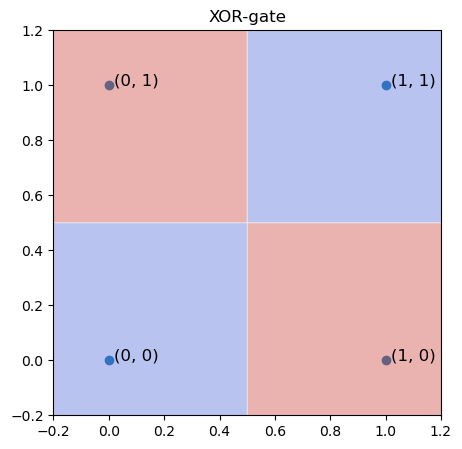

In [10]:
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 300), 
    np.linspace(-0.2, 1.2, 300) 
)
D = np.vstack((xx.flatten(), yy.flatten())).T

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    plt.annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)

plt.title("XOR-gate")
plt.contourf(xx, yy, xor_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)

### Simpel neuraal netwerk

Voorbeeld netwerk:
- 1 input `x`
- 2 'hidden' lagen met elk 1 parameter, i.e., `w1`, `w2`
- sigmoid activatie functie
- 1 output `y`

Informatie flow:
```
                ___________             
    x -- w1 --> | sigmoid | -- w2 --> y
                -----------            
```
m.a.w.

$z = \text{sigmoid}(w_1 \cdot x)$

$y = w_2 \cdot z$

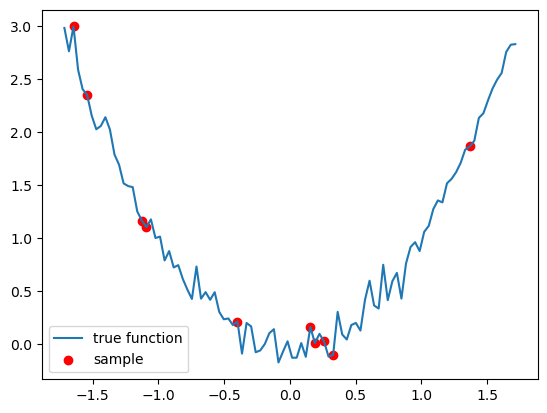

In [11]:
g = lambda x: x**2

x = np.linspace(-10, 10, 100)
x = (x - x.mean()) / x.std()
y = g(x) + np.random.normal(0, 0.1, size=x.shape[0])

idx = np.random.choice(x.shape[0], size=10)
x_train = x[idx]
y_train = y[idx]

plt.plot(x, y, label='true function')
plt.scatter(x_train, y_train, c='r', label='sample')
plt.legend()

# weights initialised with mean 0 and variance 2
w1 = np.random.normal(0, 2)
w2 = np.random.normal(0, 2)

In [12]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# feedforward model
def predict(x, w1, w2):
    z = sigmoid(x * w1)
    y = z * w2
    return z, y

# MSE loss function
loss_func = lambda y_true, y_pred: 1/y_true.shape[0] * np.sum((y_true - y_pred)**2, axis=-1)

Initieel zijn de gewichten (nog) niet juist waardoor de MSE loss hoog is

In [13]:
_, y_pred = predict(x_train, w1, w2)
loss = loss_func(y_train, y_pred)
loss

4.738925696191123

Voor veel combinaties van `w1` en `w2` kunnen we de loss berekenen en het *landschap* van de loss visualiseren

(3.693975494449231, -4.821924601381606, -1.2310527759929184)

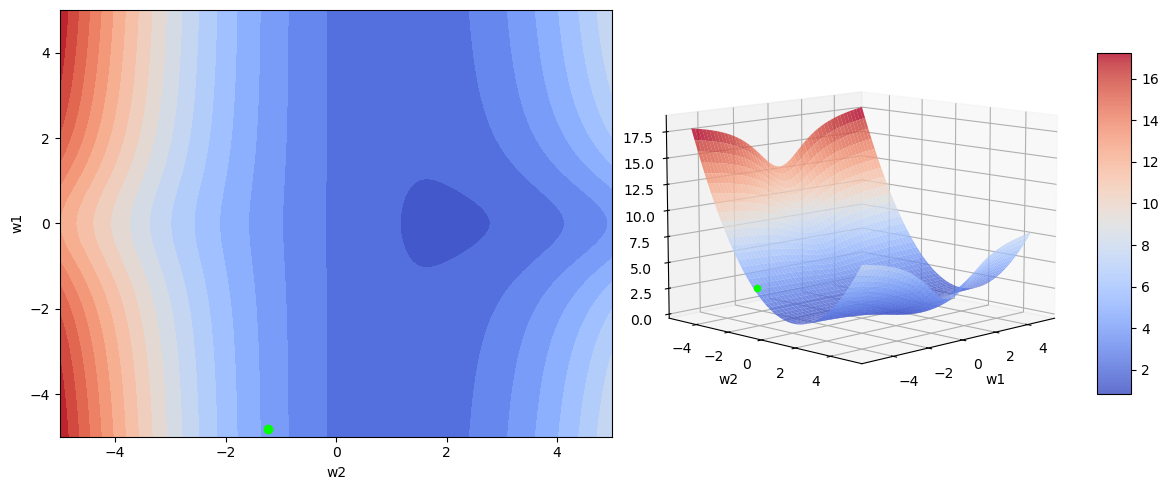

In [14]:
# try many w1, w2 pairs
w1_range = np.linspace(-5, 5, 200)
w2_range = np.linspace(-5, 5, 200)

w1_space, w2_space = np.meshgrid(w1_range, w2_range)

_, y_pred = predict(x, w1_range[..., None], w2_range[..., None, None])
losses = loss_func(y, y_pred)

_, y_pred = predict(x, w1, w2)
sample_loss = loss_func(y, y_pred)

# loss landscape
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
cont1 = ax.contourf(w2_space, w1_space, losses, 20, cmap='coolwarm')
ax.set_xlabel("w2")
ax.set_ylabel("w1")

ax.scatter(w2, w1, c='lime')

# 3d plot
ax = fig.add_subplot(1, 2, 2, projection='3d', computed_zorder=False)
surf = ax.plot_surface(w1_space, w2_space, losses, cmap='coolwarm', alpha=0.8)
fig.colorbar(surf, shrink=0.8, aspect=10, ax=ax)
# ax.view_init(90, 0)
ax.view_init(10, 45)
ax.invert_xaxis()
ax.set_xlabel("w1")
ax.set_ylabel("w2")

ax.scatter([w1], [w2], [sample_loss], c='lime')

plt.tight_layout()
sample_loss, w1, w2

- Doel is om de loss te minimaliseren. 
- We gebruiken **gradient descent** en proberen `w1`, `w2` te kiezen zodanig dat we de berg afklimmen.
- We zien dat als `w2 = 2` en `w1 = 0`, we de berg afklimmen

In [15]:
_, y_pred = predict(x_train, 0, 2)
sample_loss = loss_func(y_train, y_pred)
sample_loss

1.1064708013732234

### Optimaliseren door gradient descent (backpropagation)
- Toepassen van calculus om de gradient (afgeleide) te berekenen
- Analogie: je staat geblindoekt op een berg en voelt met je voeten *in welke richting* je het meest daalt. Die richting ga je op
- Iteratief process waarbij we `w1`, `w2` updaten. 

Het model kunnen we als volgt sequentieel structureren:
\begin{align*}
    z &= \text{sigmoid}(w_1 \cdot x)\\
    \hat{y} &= w_2 \cdot z\\
    L &= \frac{1}{2} \sum_i (y_i - \hat{y}_i)^2
\end{align*}
Dit is eigenlijk niet de MSE loss vanwege de factor $1/2$, i.p.v. $1/N$. 
- maakt de berekening makkelijker
- we gebruiken een learning rate $\eta$ dus magnitude maakt niet uit

Update rule $\Delta w_2$ is de learning rate $\eta$ maal de afgeleide van $L$ met betrekking tot $w_2$:
$$
    \Delta w_2 = \eta \sum_i (y_i - \hat{y}_i) z_i
$$
Update rule $\Delta w_1$ is de learning rate $\eta$ maal de afgeleide van $L$ met betrekking tot $w_1$:
$$
    \Delta w_1 = \eta \sum_i (y_i - \hat{y}_i) w_2 z_i(1-z_i)x_i
$$

Belangrijk:
- Kies een goede learning rate uit: 
  - hoge $\eta$ betekent dat de parameter updates te groot, waardoor je het minimum mist
  - lage $\eta$ betekent dat het enorm lang kan duren voordat een model klaar is met trainen
- Er kunnen meerdere plekken in het landschap van de loss functie zijn die optimaal is
  - lokale optima: plekken waarbij de *richting van sterkste daling* nul is
  - model kan vast komen in een lokaal optimum terwijl er een *globaal optimum* is
- Online learning vs mini-batch learning vs batch learning:
  - **Online learning**: kies at random 1 instantie en update parameters met update rule
  - **Mini-batch learning**: kies een subset uit de training set (meestal 32 instanties) en update parameters met update rule
  - **Batch learning**: kies gehele training set en update parameters met update rule

In [16]:
# opnieuw initialiseren voor gemak
w1 = np.random.normal(0, 2)
w2 = np.random.normal(0, 2)

In [17]:
EPOCHS = 10
learning_rate = 0.1

for e in range(EPOCHS):
    z, y_pred = predict(x_train, w1, w2)
    sample_loss = loss_func(y_train, y_pred)
    print(f"Epoch {e}, {sample_loss=}")
    
    # compute updates
    d_w2 = learning_rate * np.sum((y_train - y_pred) * z)
    d_w1 = learning_rate * np.sum((y_train - y_pred) * w2 * z * (1-z) * x_train)

    # update parameters
    w1 += d_w1
    w2 += d_w2

Epoch 0, sample_loss=0.9230589297473245
Epoch 1, sample_loss=0.8970502240962044
Epoch 2, sample_loss=0.8810881358896947
Epoch 3, sample_loss=0.8703665001268052
Epoch 4, sample_loss=0.8627065035035071
Epoch 5, sample_loss=0.8570025670115012
Epoch 6, sample_loss=0.8526278406217399
Epoch 7, sample_loss=0.8491951162927782
Epoch 8, sample_loss=0.8464506125705319
Epoch 9, sample_loss=0.8442210892588111


### Sklearn

Iteration 1, loss = 0.68714688
Iteration 2, loss = 0.67436604
Iteration 3, loss = 0.66247919
Iteration 4, loss = 0.64978334
Iteration 5, loss = 0.63673355
Iteration 6, loss = 0.62513173
Iteration 7, loss = 0.61450145
Iteration 8, loss = 0.60301710
Iteration 9, loss = 0.59111270
Iteration 10, loss = 0.57868675
Iteration 11, loss = 0.56523109
Iteration 12, loss = 0.55130371
Iteration 13, loss = 0.53754191
Iteration 14, loss = 0.52290207
Iteration 15, loss = 0.50645538
Iteration 16, loss = 0.48952319
Iteration 17, loss = 0.47153257
Iteration 18, loss = 0.45363185
Iteration 19, loss = 0.43551791
Iteration 20, loss = 0.41820513
Iteration 21, loss = 0.40010996
Iteration 22, loss = 0.38049392
Iteration 23, loss = 0.36051265
Iteration 24, loss = 0.34067910
Iteration 25, loss = 0.31977253
Iteration 26, loss = 0.29885533
Iteration 27, loss = 0.27775591
Iteration 28, loss = 0.25763972
Iteration 29, loss = 0.23759479
Iteration 30, loss = 0.21822309
Iteration 31, loss = 0.19931374
Iteration 32, los

1.0

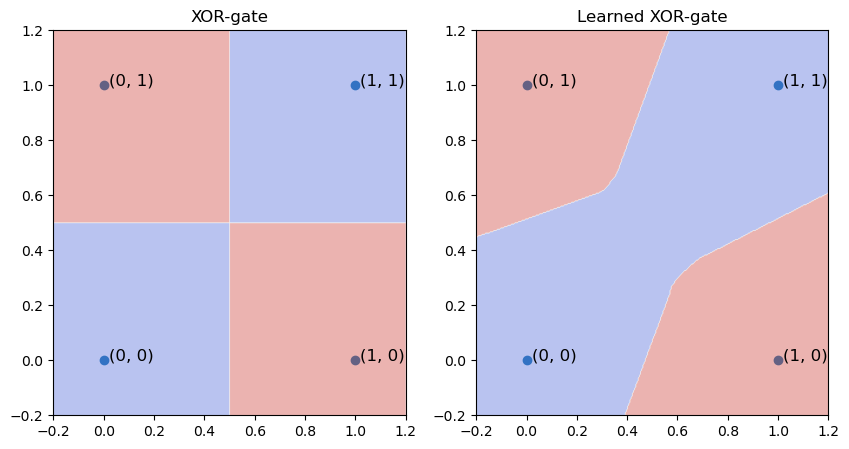

In [35]:
from sklearn.neural_network import MLPClassifier

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 300), 
    np.linspace(-0.2, 1.2, 300) 
)
D = np.vstack((xx.flatten(), yy.flatten())).T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# hand-chosen weights
ax1.scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    ax1.annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)
ax1.set_title("XOR-gate")
ax1.contourf(xx, yy, xor_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)

# MLP learning via sklearn
y = np.array([0, 1, 1, 0])

mlp = MLPClassifier(tol=1e-6, max_iter=1000, activation="relu", learning_rate_init=0.01, learning_rate='adaptive', 
                    hidden_layer_sizes=[16, 16], verbose=True, solver="adam").fit(X, y)
y_pred = mlp.predict(D)

ax2.scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    ax2.annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)
ax2.set_title("Learned XOR-gate")
ax2.contourf(xx, yy, y_pred.reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)

mlp.score(X, y)

<Axes: >

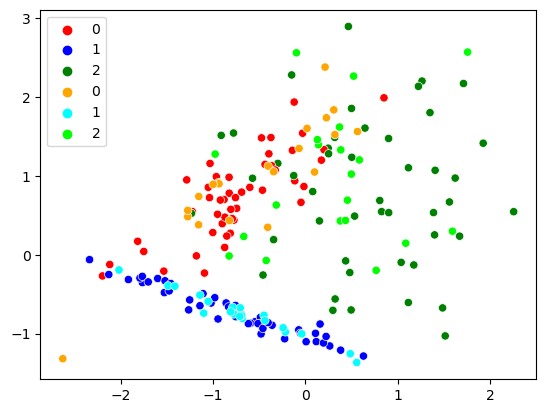

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=1
)
X = (X - X.mean())/X.std()

xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()


xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 100),
    np.linspace(ymin-.5, ymax+.5, 100)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=['r', 'b', 'g'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan', 'lime'])

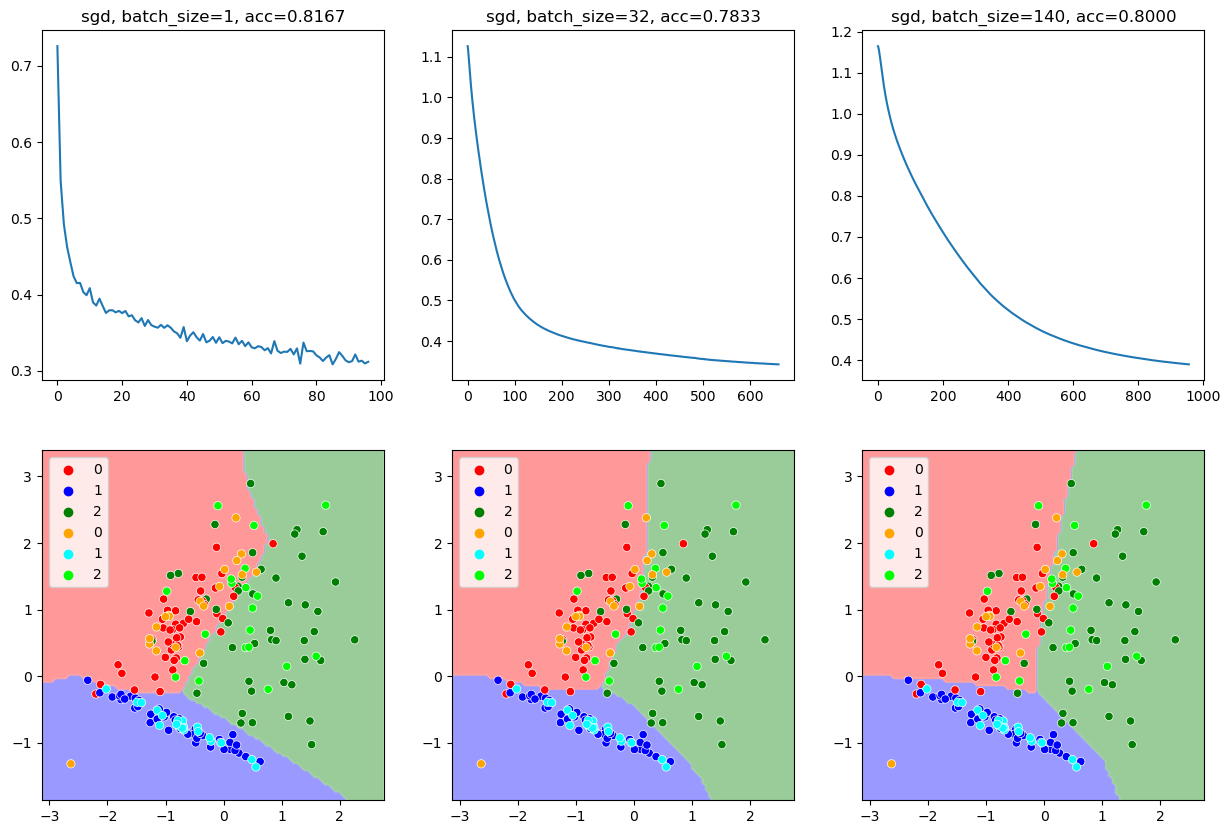

In [20]:
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['red', 'blue', 'green'])

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

batch_sizes = [1, 32, X_train.shape[0]]

for i, b in enumerate(batch_sizes):
    mlp = MLPClassifier([10], batch_size=b, solver='sgd', max_iter=1000).fit(X, y)
    acc = mlp.score(X_test, y_test)
    axes[0, i].set_title(f"sgd, batch_size={b}, {acc=:.4f}")
    sns.lineplot(x=range(len(mlp.loss_curve_)), y=mlp.loss_curve_, ax=axes[0, i])

    y_pred = mlp.predict(D)
    
    axes[1, i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=['r', 'b', 'g'], ax=axes[1, i])
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan', 'lime'], ax=axes[1, i])

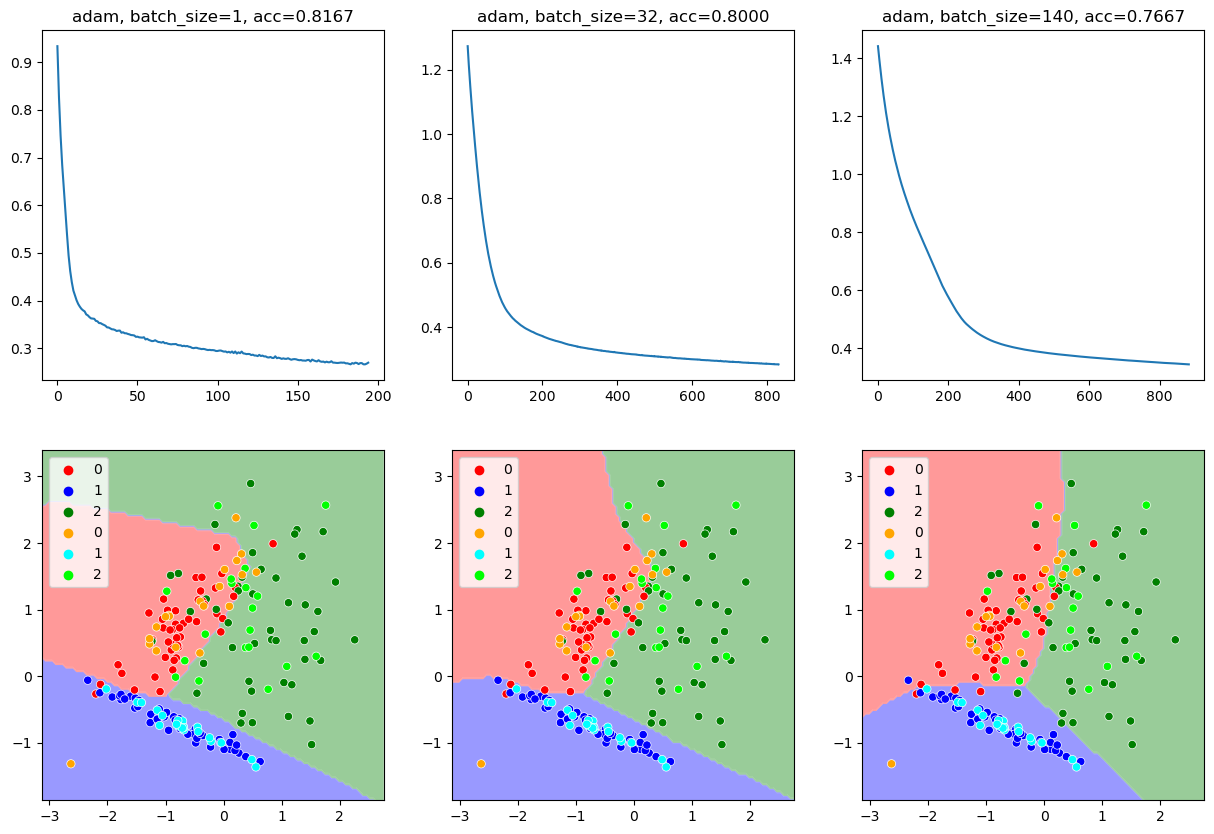

In [21]:
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['red', 'blue', 'green'])

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

batch_sizes = [1, 32, X_train.shape[0]]

for i, b in enumerate(batch_sizes):
    mlp = MLPClassifier([10], batch_size=b, solver='adam', max_iter=1000).fit(X, y)
    acc = mlp.score(X_test, y_test)
    axes[0, i].set_title(f"adam, batch_size={b}, {acc=:.4f}")
    sns.lineplot(x=range(len(mlp.loss_curve_)), y=mlp.loss_curve_, ax=axes[0, i])

    y_pred = mlp.predict(D)
    
    axes[1, i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=['r', 'b', 'g'], ax=axes[1, i])
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan', 'lime'], ax=axes[1, i])